In [12]:
!uv pip install langgraph

Using Python 3.11.10 environment at: /home/ubu/Documents/work/l4t/langchain-langgraph-python/.venv
Audited 1 package in 2ms


In [4]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from IPython.display import Image, display

In [6]:
def reducer(a: list, b: int | None) -> list:
    if b is not None:
       return a + [b]
    return a

class State(TypedDict):
    messages: Annotated[list, reducer]


graph = StateGraph(State)

def add(num1: int, num2: int) -> int:
    return num1 + num2


def print(a: str) -> None:
    print(a)


graph.add_node('addition', add)
graph.add_node('printing', print)

graph.add_edge(START, 'addition')
graph.add_edge('addition', 'printing')
graph.add_edge('printing', END)

compiled = graph.compile()


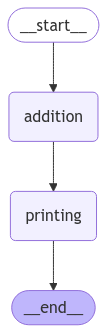

In [8]:

try:
    display(Image(compiled.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass